# HBA PA4

French version: https://github.com/Daniel-R-Armstrong/French-Wiki-2500-Pretrained-SentencePiece-LM/blob/master/fr_spm.ipynb
https://forums.fast.ai/t/sentencepiece/53010/50

# Turkish ULMFiT from scratch

In [ ]:
# #hide
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [ ]:
# import sys
# !{sys.executable} -m pip install fastai==1.0.61 #This right here

In [ ]:
# import sys
# !{sys.executable} -m pip install fastcore==1. #This right here

In [ ]:
# #fastai v1 API: https://fastai1.fast.ai/overview.html
# from fastai.basics import *

In [ ]:
# from fastai.utils import *
# show_install()

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *

In [2]:
print ('hello')

hello


In [3]:
from fastai.imports import *

In [4]:
data_path = Path('/home/ec2-user/.fastai/data')

In [5]:
bs=128
torch.cuda.set_device(2)
# data_path = Config.data_path()
# data_path = '/home/ec2-user/.fastai/data'

lang = 'tx'
name = f'{lang}wiki'
path = data_path/name
path.mkdir(exist_ok=True, parents=True)

In [6]:
mdl_path = path/'models'
mdl_path.mkdir(exist_ok=True)
lm_fns = [mdl_path/f'{lang}_wt', mdl_path/f'{lang}_wt_vocab']

In [7]:
path

PosixPath('/home/ec2-user/.fastai/data/txwiki')

In [8]:
lang

'tx'

## Turkish wikipedia model

In [8]:
# #HBA
# import sys
# !{sys.executable} -m pip install wikiextractor

In [9]:
# !pip install wikiextractor

In [9]:
from nlputils import split_wiki,get_wiki

## Uncompress wiki file from cli

Source: https://github.com/attardi/wikiextractor

1. Do `python setup.py install`
1. Double check with: `which wikiextractor`

`
base) [ec2-user@ip-172-16-69-8 trwiki]$ which wikiextractor
~/anaconda3/bin/wikiextractor
`

1. Uncrompress

`
(base) [ec2-user@ip-172-16-69-8 trwiki]$ python -m wikiextractor.WikiExtractor trwiki-latest-pages-articles.xml
INFO: 2832129   Mucize Dünyası: New York – Birleşik Kahramanlar
INFO: 2832111   Kraliyet Mühendislik Akademisi üyesi kadınlar listesi
INFO: 2832131   Ilana Rovina
INFO: 2832155   Artur Taymazov
INFO: 2832130   Enka (kadın voleybol takımı) 1992-93 sezonu
INFO: Finished 31-process extraction of 377951 articles in 123.1s (3071.5 art/s)
INFO: total of page: 732729, total of articl page: 377951; total of used articl page: 377951
(base) [ec2-user@ip-172-16-69-8 trwiki]$ which wikiextractor
~/anaconda3/bin/wikiextractor
`
    


In [10]:
get_wiki(path,lang)

downloading...
unzipping...
extracting... akirmak


In [11]:
# from nlputils import split_wiki,get_wiki

# get_wiki(path,lang)
!head -n4 {path}/{name}

<doc id="10" url="https://tr.wikipedia.org/wiki?curid=10" title="Cengiz Han">
Cengiz Han

Cengiz Han (doğum Temuçin, – 18 Ağustos 1227) ölümünden sonra tarihin en büyük yüzölçümüne sahip imparatorluğu haline gelmiş Moğol İmparatorluğu'nun kurucusu ve ilk Kağanı ve İmparatoru olan Moğol komutan ve hükümdar. 13. Yüzyılın başında Orta Asya'daki tüm göçebe bozkır kavimlerini birleştirerek bir ulus hâline getirdi ve o ulusu "Moğol" siyasi kimliği çatısı altında topladı.


In [12]:
path.ls()

[PosixPath('/home/ec2-user/.fastai/data/txwiki/wikiextractor-orig'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/txwiki-latest-pages-articles.xml'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/txwiki-latest-pages-articles.xml.bz2'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/log'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/wikiextractor'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/docs'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/models'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/txwiki')]

In [13]:
dest = split_wiki(path,lang)

/home/ec2-user/.fastai/data/txwiki/docs already exists; not splitting


In [14]:
dest.ls()[:5]

[PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Kara delik.txt'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Heaviside katmanı.txt'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Zurna.txt'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Özallı Yıllar.txt'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Kuşça, Cihanbeyli.txt')]

In [15]:
dest

PosixPath('/home/ec2-user/.fastai/data/txwiki/docs')

Turkish is an [Agglutinative_language](https://en.wikipedia.org/wiki/Agglutinative_language) so it needs special care!

![Turkish morphemes example](images/turkish.jpg)

# HBA fix

1. Open via: `vi ~/SageMaker/.env/fastai/lib/python3.6/site-packages/fastai/text/data.py`
1. see: https://forums.fast.ai/t/multifit-runtime-error-permission-denied/72874/5
1. See: https://github.com/fastai/fastai/issues/2572 

In [16]:
dest

PosixPath('/home/ec2-user/.fastai/data/txwiki/docs')

In [17]:
dest.ls()[:5]

[PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Kara delik.txt'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Heaviside katmanı.txt'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Zurna.txt'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Özallı Yıllar.txt'),
 PosixPath('/home/ec2-user/.fastai/data/txwiki/docs/Kuşça, Cihanbeyli.txt')]

In [18]:
#PRINT NUMBER OF FILES IN DIR
!find /home/ec2-user/.fastai/data/txwiki/docs -mindepth 1 -maxdepth 1 -printf '.' | wc -c

56219


In [ ]:
#REMOVE ALL BUT 1O FILES
# !ls -1tr /home/ec2-user/.fastai/data/txwiki/docs | head -n -100 | xargs -d '\n' rm -f --

In [ ]:
# # x.sh
# cp "Zurna.txt" ../docs-100/
# cp "Ulucak Höyüğü.txt" ../docs-100/
# cp "Özallı Yıllar.txt" ../docs-100/
# cp "Kuşça, Cihanbeyli.txt" ../docs-100/
# cp "Kara delik.txt" ../docs-100/
# cp "Heaviside katmanı.txt" ../docs-100/
# cp "Çağlar Söyüncü.txt" ../docs-100/
# cp "Bilim ve Teknik.txt" ../docs-100/
# cp "Arş.txt" ../docs-100/
# cp "Amnesia: Dark Descent.txt" ../docs-100/
# cp "Yunancanın romanizasyonu.txt" ../docs-100/
# cp "Yön Tanrıları.txt" ../docs-100/
# cp "Yemeksepeti.com.txt" ../docs-100/
# cp "Yaman, Mudanya.txt" ../docs-100/
# cp "WWE 24_7 Championship.txt" ../docs-100/
# cp "Wilhelm Reich.txt" ../docs-100/
# cp "Web grafik tasarımı.txt" ../docs-100/
# cp "Vuslat Doğan Sabancı.txt" ../docs-100/
# cp "Vladislav Tretyak.txt" ../docs-100/
# cp "VIII. Henry.txt" ../docs-100/
# cp "Us (The Walking Dead).txt" ../docs-100/
# cp "USS Arizona (BB-39).txt" ../docs-100/
# cp "Türk Kurtuluş Savaşı sırasında katliamlar.txt" ../docs-100/
# cp "TRT 1.txt" ../docs-100/
# cp "Transvaal Cumhuriyeti.txt" ../docs-100/
# cp "Trabzon Konferansı.txt" ../docs-100/
# cp "Today Was a Fairytale.txt" ../docs-100/
# cp "Tehlikeli Oyun (film, 2008).txt" ../docs-100/
# cp "TCG Berk.txt" ../docs-100/
# cp "Taziz.txt" ../docs-100/
# cp "Taye Taiwo.txt" ../docs-100/
# cp "Tatyana Volosojar.txt" ../docs-100/
# cp "Tanzanya arması.txt" ../docs-100/
# cp "Süleyman Türkünal.txt" ../docs-100/
# cp "Street Fighter (video oyunu).txt" ../docs-100/
# cp "Sons of Anarchy.txt" ../docs-100/
# cp "Sol SR.txt" ../docs-100/
# cp "Sloven İstihbarat ve Güvenlik Ajansı.txt" ../docs-100/
# cp "Simon bar Kohba.txt" ../docs-100/
# cp "Silverline Ankastre.txt" ../docs-100/
# cp "Sıçansılar (balık).txt" ../docs-100/
# cp "Shim Changmin.txt" ../docs-100/
# cp "Seş.txt" ../docs-100/
# cp "Şar Dağları.txt" ../docs-100/
# cp "San Marino millî futbol takımı.txt" ../docs-100/
# cp "Saga Norén.txt" ../docs-100/
# cp "Robot of Sherwood.txt" ../docs-100/
# cp "Refik Turan.txt" ../docs-100/
# cp "RaceRoom.txt" ../docs-100/
# cp "Porsche 911 GT2.txt" ../docs-100/
# cp "Piçan İlçesi.txt" ../docs-100/
# cp "Perşa Liha.txt" ../docs-100/
# cp "Perpa.txt" ../docs-100/
# cp "Pepsi Twist.txt" ../docs-100/
# cp "Outlook Express.txt" ../docs-100/
# cp "Öter ardıç kuşu.txt" ../docs-100/
# cp "Østfold.txt" ../docs-100/
# cp "Ortak varlıkların trajedisi.txt" ../docs-100/
# cp "Ondokuz Mayıs Üniversitesi.txt" ../docs-100/
# cp "Ömer Dinçer.txt" ../docs-100/
# cp "Nissim Kamondo.txt" ../docs-100/
# cp "Nif geni.txt" ../docs-100/
# cp "Nick Hornby.txt" ../docs-100/
# cp "Neo Geo.txt" ../docs-100/
# cp "NBA Yılın En İyi Beşi.txt" ../docs-100/
# cp "Nancy Atakan.txt" ../docs-100/
# cp "Nacho Vidal.txt" ../docs-100/
# cp "Mukor.txt" ../docs-100/
# cp "Miuccia Prada.txt" ../docs-100/
# cp "Millî marş.txt" ../docs-100/
# cp "Millet İttifakı.txt" ../docs-100/
# cp "Mikio Oda.txt" ../docs-100/
# cp "Matvey Muranov.txt" ../docs-100/
# cp "Maliye Bakanlığı (Azerbaycan).txt" ../docs-100/
# cp "Malabadi Köprüsü.txt" ../docs-100/
# cp "Makas Eller.txt" ../docs-100/
# cp "Lund Üniversitesi.txt" ../docs-100/
# cp "Liemba.txt" ../docs-100/
# cp "LA X.txt" ../docs-100/
# cp "Lando Buzzanca.txt" ../docs-100/
# cp "Kutsal Duman.txt" ../docs-100/
# cp "Kurtlar Vadisi bölümleri listesi.txt" ../docs-100/
# cp "Kuch Kuch Hota Hai.txt" ../docs-100/
# cp "Koyulhisar.txt" ../docs-100/
# cp "Kökpar.txt" ../docs-100/
# cp "Kitap tasarımı.txt" ../docs-100/
# cp "Kelime.txt" ../docs-100/
# cp "Kazatomprom.txt" ../docs-100/
# cp "Kayseri'de 2009 Türkiye yerel seçimleri.txt" ../docs-100/
# cp "Karpal tünel sendromu.txt" ../docs-100/
# cp "Kanserojen.txt" ../docs-100/
# cp "Joseph Henry.txt" ../docs-100/
# cp "José Bosingwa.txt" ../docs-100/
# cp "John 5.txt" ../docs-100/
# cp "Je suis Charlie.txt" ../docs-100/
# cp "Jesse Ventura.txt" ../docs-100/
# cp "Jérôme Rothen.txt" ../docs-100/
# cp "Japon militarizmi.txt" ../docs-100/
# cp "Iustinus.txt" ../docs-100/
# cp "İstihbarat Bakanlığı (İran).txt" ../docs-100/


In [19]:
#PRINT NUMBER OF FILES IN DIR
!find /home/ec2-user/.fastai/data/txwiki/docs -mindepth 1 -maxdepth 1 -printf '.' | wc -c

100


In [20]:
data = (TextList.from_folder(dest, processor=[OpenFileProcessor(), SPProcessor()])
        .split_by_rand_pct(0.1, seed=42)
        .label_for_lm()
        .databunch(bs=bs, num_workers=1))

data.save(f'{lang}_databunch')
len(data.vocab.itos),len(data.train_ds)

/home/ec2-user/SageMaker/.env/fastai/lib/python3.6/site-packages/fastai/text/data.py:476: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ds.items = np.array(sum(e.map(self._encode_batch, partition_by_cores(ds.items, self.n_cpus)), []))


(5736, 90)

In [21]:
data = load_data(dest, f'{lang}_databunch', bs=bs)

In [22]:
data.show_batch()

/home/ec2-user/SageMaker/.env/fastai/lib/python3.6/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,". ▁yükseklik ten ▁sonra ▁başlar . ▁xxmaj ▁bu ▁ismi n ▁veril mesi nin ▁sebebi ▁i yon osfer ▁bölgesinde ▁güneş ▁rüzg ar ı ▁ve ▁ko z mik ▁ ışık ▁gibi ▁uzay ▁kaynak lı ▁etkiler den ▁ötürü ▁i yon ▁yoğunluğu nun ▁yüksek ▁oluş u dur . ▁xxmaj ▁bu ▁i yon lar ▁çeşitli ▁ara ▁katman lara ▁yol ▁açar . ▁xxmaj ▁bilim ▁dünya sında ▁bu ▁ara ▁katman lar ▁xxup ▁ d , e ,"
1,"▁ar x e oloji ▁kazı n tılar ▁zaman ı ▁mar al ▁ boynuz un dan ▁hazırlanmış ▁dört ▁adet ▁zurna ▁ aş kar ▁edilmişti r . ▁xxmaj ▁bilim ▁adam larının ▁hesap lama larına ▁göre , ▁yüksek ▁ ze v k le ▁yapılmış ▁bu ▁çalgı ların ▁üç ▁bin ▁yıl ▁yaş ı ▁vardır . ▁xxmaj ▁esasen ▁erik , ▁ceviz , ▁ ya ba nı ▁ s öğüt ▁ve ▁ du t ▁ağa c"
2,"▁xxmaj ▁demir el ' in ▁tekrar ▁başbakan ▁olması , ▁xxmaj ▁özal ' ın ▁hem ▁xxmaj ▁demir el ▁hem ▁de ▁xxmaj ▁yılmaz ▁ile ▁anlaşma z lığı , ▁xxmaj ▁özal ' ın ▁anap ' tan ▁ko p u şu , ▁yeni ▁parti ▁ arayışlar ı ▁ve ▁ ölümüne ▁yer ▁verildi . ▁< ▁/ ▁ doc > ▁xxbos ▁xxmaj ▁kuşça , ▁xxmaj ▁cihanbeyli ▁xxmaj ▁kuşca ▁( k ür t çe : ▁xxmaj ▁he"
3,"7 ▁cm ) ö l ç ü lerinde ▁basıl maya ▁başlan dı . ▁2001 ▁yılında ▁xxmaj ▁i ̇ r f an ▁xxmaj ▁say ar ' ın ▁çiz diği ▁xxmaj ▁ zi h ni ▁xxmaj ▁sinir ' in ▁"" p ro ce lerini "" ▁yayınla maya ▁başladı . ▁xxmaj ▁bu ▁yıl da ▁400 . ▁sayısında ▁( mar t ▁2001 ) ▁birlikte ▁ek ▁olarak ▁"" i ̇ nsan ▁xxmaj ▁genomu "" ▁verildi"
4,"▁sonra ▁xxmaj ▁daniel ▁bir ▁ ışık ▁görür ▁ve ▁xxmaj ▁ag rip pa ' nın ▁sesi ▁duyul ur ; ▁xxmaj ▁w e ye r ' a ▁xxmaj ▁daniel ' ı ▁kurtar mak ▁için ▁bir ▁şey ▁yap masını ▁söyler ▁ve ▁xxmaj ▁daniel ▁hayat a ▁geri ▁döner . ▁< br > ▁xxmaj ▁gizli ▁xxmaj ▁son : ▁xxmaj ▁alexander , ▁xxmaj ▁daniel ' ı ▁hücre ye ▁atar ▁ve ▁ona ▁bekle mesi ni ▁söyler ."


In [23]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.1, wd=0.1, pretrained=False).to_fp16()

# HBA French

In [29]:
learn.lr_find(stop_div=False, num_it=5)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Failed to compute the gradients, there might not be enough points.


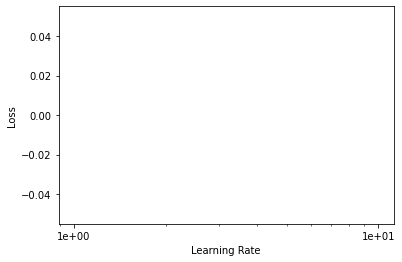

In [30]:
learn.recorder.plot(suggestion=True)

In [24]:
lr = 3e-3
lr *= bs/48  # Scale learning rate by batch size

In [25]:
learn.unfreeze()
learn.fit_one_cycle(10, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,7.656495,6.846730,0.056994,00:17
1,7.206811,7.901802,0.038951,00:16
2,7.146518,6.850193,0.056994,00:16
3,6.994226,6.723795,0.056994,00:16
4,6.892519,6.729263,0.056994,00:17
5,6.824438,6.711360,0.056994,00:16
6,6.777204,6.704089,0.056994,00:17
7,6.742869,6.696327,0.056994,00:17
8,6.714705,6.692200,0.056994,00:17
9,6.693724,6.691544,0.056994,00:17


/home/ec2-user/SageMaker/.env/fastai/lib/python3.6/site-packages/torch/nn/modules/module.py:1319: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if p.grad is not None:
/home/ec2-user/SageMaker/.env/fastai/lib/python3.6/site-packages/torch/nn/modules/module.py:1319: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytor

In [26]:
learn.to_fp32().save(lm_fns[0], with_opt=False)
learn.data.vocab.save(lm_fns[1].with_suffix('.pkl'))

## Turkish sentiment analysis

https://www.win.tue.nl/~mpechen/projects/smm/

### Language model

In [ ]:
path_clas = path/'movies'
path_clas.ls()

In [ ]:
pos = (path_clas/'tr_polarity.pos').open(encoding='iso-8859-9').readlines()
pos_df = pd.DataFrame({'text':pos})
pos_df['pos'] = 1
pos_df.head()

In [ ]:
neg = (path_clas/'tr_polarity.neg').open(encoding='iso-8859-9').readlines()
neg_df = pd.DataFrame({'text':neg})
neg_df['pos'] = 0
neg_df.head()

In [ ]:
df = pd.concat([pos_df,neg_df], sort=False)

In [ ]:
data_lm = (TextList.from_df(df, path_clas, cols='text', processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1))

data_lm.save(f'{lang}_clas_databunch')

In [ ]:
data_lm = load_data(path_clas, f'{lang}_clas_databunch', bs=bs)

In [ ]:
data_lm.show_batch()

In [ ]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=lm_fns, drop_mult=1.0, wd=0.1)

In [ ]:
lr = 1e-3
lr *= bs/48

In [ ]:
learn_lm.fit_one_cycle(1, lr*10, moms=(0.8,0.7))

In [ ]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(5, slice(lr/10,lr*10), moms=(0.8,0.7))

In [ ]:
learn_lm.save(f'{lang}fine_tuned')
learn_lm.save_encoder(f'{lang}fine_tuned_enc')

### Classifier

In [ ]:
data_clas = (TextList.from_df(df, path_clas, cols='text', processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.1, seed=42)
    .label_from_df(cols='pos')
    .databunch(bs=bs, num_workers=1))

In [ ]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False, wd=0.1).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc')
learn_c.freeze()

In [ ]:
lr=2e-2
lr *= bs/48

In [ ]:
learn_c.fit_one_cycle(2, lr, moms=(0.8,0.7))

In [ ]:
learn_c.fit_one_cycle(2, lr, moms=(0.8,0.7))

In [ ]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), moms=(0.8,0.7))

In [ ]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4),lr/2), moms=(0.8,0.7))

In [ ]:
learn_c.unfreeze()
learn_c.fit_one_cycle(4, slice(lr/10/(2.6**4),lr/10), moms=(0.8,0.7))

Accuracy in Gezici (2018), *Sentiment Analysis in Turkish* is: `75.16%`.

In [ ]:
learn_c.save(f'{lang}clas')

## fin